<a href="https://colab.research.google.com/github/phmehta95/MedicalPhysicsMSc/blob/main/Session_4_Pandas_and_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `pandas` module


This module helps us deal with data, in particular large structured data sets. See the [online documentation](https://pandas.pydata.org/docs/user_guide/index.html) for the full details.

To use it, we first need to import the module. The recommended convention is to import the module under the alias `pd`:

In [1]:
import pandas as pd

## Importing data using pandas

We can use pandas to import data from a file.

The data we are going to look at comes from the gait lab, and consists of a database containing all the patient data collected over the years. Included in this database is a clinical examination table with all the clinical examination measurements made from every patient seen at the gait lab.

This has been exported to an excel sheet and we are now going to read this in using `pandas`. Uploading data is easier in other environments - the code given below will allow you to upload the data into Colab. In other environments, you might use code such as the following:
```python
filename = "G:\GaitLabDocs\Nicky\clinical_exam.xlsx"
df = pd.read_excel(filename)
```

> 💡  After you have clicked on play for the code snippet below, you will need to use the 'Choose files' button to navigate to and select the file you want to upload: you need to pick the `clinical_exam_short` Excel file.

In [2]:
from google.colab import files
import io

uploaded = files.upload()
a = list (uploaded.keys())
df = pd.read_excel (io.BytesIO (uploaded[a[0]]), sheet_name="clinical_exam")

Saving clinical_exam_short(2).xlsx to clinical_exam_short(2).xlsx


In [ ]:
df

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Lmdfflexb,Rmdfflexa,Rmdfflexb,Lmdfexta,Lmdfextb,Rmdfexta,Rmdfextb
0,84.0,84.0,1540.0,47.4,51.0,68.0,6.0,df,14.0,df,5.0,df,5.0,df
1,78.0,78.0,151.0,40.6,74.0,71.0,14.0,df,7.0,df,7.0,df,7.0,df
2,NaN,NaN,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85.0,84.5,156.5,52.3,69.0,70.0,11.0,pf,5.0,pf,20.0,pf,15.0,pf
4,60.0,60.5,122.0,24.6,45.0,60.0,10.0,pf,10.0,pf,40.0,pf,20.0,pf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4524,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pandas provides the `read_excel()` function, which we can use to load our dataset. This returns a Pandas _dataframe_ (hence we name the output variable `df`).

## Introducing the clinical exam data sheet

This has been lifted straight from the gait lab's clinical database and is the table containing a few measures from the clinical exam data for all the patients.

There are measurements for height, weight, led length, popliteal angle, ankle dorsiflexion range, ... What these measures mean is illustrated below.


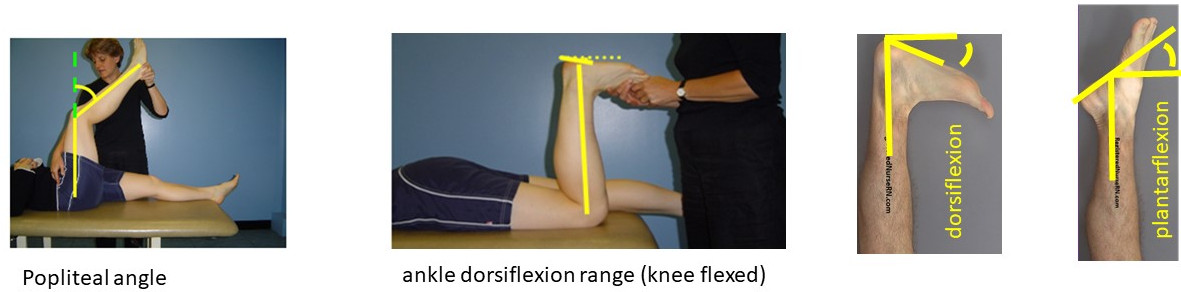

Now that the data is uploaded we want to start having a look at it. Remember we can find out all the methods associated with `df` by using `dir()` function:


In [3]:
dir(df)

['LLegLen',
 'Lkneepop',
 'Lmdfexta',
 'Lmdfextb',
 'Lmdfflexa',
 'Lmdfflexb',
 'RLegLen',
 'Rkneepop',
 'Rmdfexta',
 'Rmdfextb',
 'Rmdfflexa',
 'Rmdfflexb',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul_


We can look at the top of the datafile - that is the column headings and the first 5 rows of data using `.head()`

In [4]:
df.head()

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Lmdfflexb,Rmdfflexa,Rmdfflexb,Lmdfexta,Lmdfextb,Rmdfexta,Rmdfextb
0,84.0,84.0,1540.0,47.4,51.0,68.0,6.0,df,14.0,df,5.0,df,5.0,df
1,78.0,78.0,151.0,40.6,74.0,71.0,14.0,df,7.0,df,7.0,df,7.0,df
2,NaN,NaN,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85.0,84.5,156.5,52.3,69.0,70.0,11.0,pf,5.0,pf,20.0,pf,15.0,pf
4,60.0,60.5,122.0,24.6,45.0,60.0,10.0,pf,10.0,pf,40.0,pf,20.0,pf


Or we may want to know some stats about certain parameters. We can use the dataframe's `describe()` method to give us some summary statistics:

In [5]:
df.describe()

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Rmdfflexa,Lmdfexta,Rmdfexta
count,4285.000000,4287.000000,4291.000000,4294.000000,4390.000000,4396.000000,4388.000000,4393.000000,4398.000000,4402.000000
mean,73.962637,73.920296,144.067353,38.950657,61.870159,61.394904,11.181176,11.552925,8.123010,8.073603
std,29.489842,29.591212,68.104898,17.858524,13.582453,13.416344,8.713600,8.662567,7.585918,7.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.500000,63.500000,124.700000,24.900000,54.000000,54.000000,5.000000,5.000000,3.000000,3.000000
50%,74.000000,74.000000,141.300000,35.600000,62.000000,62.000000,10.000000,10.000000,6.000000,6.000000
75%,83.000000,83.000000,157.800000,50.000000,70.000000,70.000000,16.000000,17.000000,11.000000,11.000000
max,920.000000,920.000000,1640.000000,140.300000,120.000000,130.000000,100.000000,100.000000,100.000000,100.000000


### Exercise 1

Try running the commands below to see what they do, and write a comment by each one explaining what it does.

In [6]:
df['height'] #height of patients in cm

,height
0,1540.0
1,151.0
2,NaN
3,156.5
4,122.0
...,...
4521,NaN
4522,NaN
4523,NaN
4524,21.0


In [8]:
df['height'][3] #height of fourth entry

np.float64(156.5)

In [10]:
df.info() #summary of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LLegLen    4285 non-null   float64
 1   RLegLen    4287 non-null   float64
 2   height     4291 non-null   float64
 3   weight     4294 non-null   float64
 4   Lkneepop   4390 non-null   float64
 5   Rkneepop   4396 non-null   float64
 6   Lmdfflexa  4388 non-null   float64
 7   Lmdfflexb  4388 non-null   object 
 8   Rmdfflexa  4393 non-null   float64
 9   Rmdfflexb  4390 non-null   object 
 10  Lmdfexta   4398 non-null   float64
 11  Lmdfextb   4401 non-null   object 
 12  Rmdfexta   4402 non-null   float64
 13  Rmdfextb   4401 non-null   object 
dtypes: float64(10), object(4)
memory usage: 495.2+ KB


In [11]:
df.iloc[3] #info for third row

,3
LLegLen,85.0
RLegLen,84.5
height,156.5
weight,52.3
Lkneepop,69.0
Rkneepop,70.0
Lmdfflexa,11.0
Lmdfflexb,pf
Rmdfflexa,5.0
Rmdfflexb,pf


In [14]:
df.height>1000 #checking whether height is greater than 1000

,height
0,True
1,False
2,False
3,False
4,False
...,...
4521,False
4522,False
4523,False
4524,False


In [16]:
df[df.height>1000] #selecting rows with a height greater than 1000cm

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Lmdfflexb,Rmdfflexa,Rmdfflexb,Lmdfexta,Lmdfextb,Rmdfexta,Rmdfextb
0,84.00,84.00,1540.0,47.4,51.0,68.0,6.0,df,14.0,df,5.0,df,5.0,df
17,56.00,56.00,1120.0,21.9,38.0,36.0,17.0,df,16.0,df,14.0,df,10.0,df
20,61.00,61.00,1200.0,18.1,51.0,57.0,12.0,df,6.0,pf,6.0,df,5.0,pf
33,605.00,590.00,1190.0,21.0,49.0,55.0,11.0,df,0.0,NaN,4.0,df,0.0,NaN
48,59.00,60.00,1180.0,22.1,55.0,54.0,20.0,pf,11.0,df,25.0,pf,3.0,df
62,85.00,88.00,1640.0,49.0,36.0,35.0,10.0,pf,6.0,df,10.0,pf,1.0,df
89,77.00,78.00,1460.0,31.7,104.0,96.0,2.0,df,4.0,df,0.0,df,5.0,df
106,54.75,55.25,1125.0,15.8,70.0,68.0,21.0,pf,22.0,pf,27.0,pf,30.0,pf
121,64.50,66.50,1270.0,25.9,60.0,52.0,6.0,df,15.0,df,11.0,pf,10.0,df
179,63.00,63.50,1270.0,23.0,75.0,75.0,13.0,df,11.0,df,0.0,df,2.0,df


In [18]:
sum(df.height>1000) #number of rows with a height greater than 1000

12

In [19]:
sum (df.Lmdfflexb == 'pf') #number of rows with Lmdfflexb equal to pf

678

In [21]:
print(df.height) #printing height

0       1540.0
1        151.0
2          NaN
3        156.5
4        122.0
         ...  
4521       NaN
4522       NaN
4523       NaN
4524      21.0
4525     169.0
Name: height, Length: 4526, dtype: float64


In [22]:
print(df['height'])

0       1540.0
1        151.0
2          NaN
3        156.5
4        122.0
         ...  
4521       NaN
4522       NaN
4523       NaN
4524      21.0
4525     169.0
Name: height, Length: 4526, dtype: float64


Look back at the summary data and the top few rows of data - is there anything that may be a problem with this data?

This is a real clinical database and there are missing data.
Let's find out how much missing data there is...




## A closer look at `height`


### Exercise 2

- What is the min & max height from our data set?
- what do you think the problems are?

In [23]:
# write your code here

In [24]:
# ANSWER

print (min(df.height), max(df.height))

0.0 1640.0


## Missing data

With a dataframe we can use the dataframe's `apply()` method to apply a operation to each entry. Once again, lambda functions come in handy. We can use this to find out where our data is missing (has null value):

In [25]:
df.apply (lambda x : x.isnull())

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Lmdfflexb,Rmdfflexa,Rmdfflexb,Lmdfexta,Lmdfextb,Rmdfexta,Rmdfextb
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4522,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4523,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4524,True,True,False,True,True,True,True,True,True,True,True,True,True,True


The `isnull()` method gives an output of `TRUE` or `FALSE` depending on whether `value` is null (NaN). We can then count the null values:

In [27]:
df.apply (lambda x : sum (x.isnull()), axis=0)

,0
LLegLen,241
RLegLen,239
height,235
weight,232
Lkneepop,136
Rkneepop,130
Lmdfflexa,138
Lmdfflexb,138
Rmdfflexa,133
Rmdfflexb,136


- `axis=0` means we are looking at the dataframe column-by-column. If we wanted to look at the data row by row we could use `axis=1`.

- By default `axis = 0`, and this can be left out.

- `x.isnull()` can be read as "is the value in `x` NaN?"

- the `sum()` bit then count them all up. Since `.isnull()` returns `TRUE` or `FALSE`, which is implicitly equivalent to 1 or 0, summing the values is equivalent to counting the `TRUE` values.



## Handling missing data

There are different ways to deal with missing data:
- We could use the rest of our dataset to estimate what the value of our missing data is (_data imputation_).
- We could delete all data rows where there are null values.

In this case, we will just delete the rows. A pandas dataframe has a handy method for this: `dropna()`

We now know that there are 235 clinical exams where `height` has not been recorded. For now, let's not look at these clinical exam entries - after all we have over 3500 other entries to look at.

So we will make a copy of the dataframe but without any rows that have any null entries:

In [28]:
df2 = df.dropna()
df2.describe()

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Rmdfflexa,Lmdfexta,Rmdfexta
count,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000
mean,73.784409,73.744616,143.626806,38.810731,62.142857,61.631467,11.190318,11.598007,8.066682,8.028477
std,28.535356,28.713145,65.379281,17.697688,13.472392,13.306683,8.724212,8.691361,7.523115,7.002434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.500000,63.250000,124.700000,24.800000,54.000000,54.000000,5.000000,5.000000,3.000000,3.000000
50%,74.000000,74.000000,141.000000,35.400000,62.000000,62.000000,10.000000,10.000000,6.000000,6.000000
75%,83.000000,83.000000,157.500000,49.900000,70.000000,70.000000,16.000000,17.000000,11.000000,11.000000
max,920.000000,920.000000,1640.000000,140.300000,120.000000,130.000000,100.000000,100.000000,100.000000,100.000000


We no longer have missing values. However, there are still clearly issues with the data: a lot of the rows contain data where for example, `height` is recorded as 0, which is clearly not correct.



### Exercise 3

Can you count all rows where `height` = 0?

In [30]:
print(sum(df2.height == 0))

3


In [31]:
# ANSWER

# how many zero values in height column
sum (df2.height == 0)

3

### Exercise 4

Remove all rows where `height` = 0, or `weight` = 0, or left or right leg length = 0:


In [35]:
df2 = df2.drop(df2[(df2.height==0) | (df2.weight==0) | (df2.LLegLen==0) | (df2.RLegLen==0)].index)
df2.describe()

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Rmdfflexa,Lmdfexta,Rmdfexta
count,4206.000000,4206.000000,4206.00000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000
mean,73.840823,73.800478,143.77039,38.875088,62.137660,61.628626,11.185449,11.596767,8.063481,8.028768
std,28.490642,28.668902,65.29776,17.643474,13.453945,13.295667,8.724742,8.682155,7.525747,7.005171
min,17.700000,17.700000,1.36000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.500000,63.500000,124.82500,24.900000,54.000000,54.000000,5.000000,5.000000,3.000000,3.000000
50%,74.000000,74.000000,141.00000,35.500000,62.000000,62.000000,10.000000,10.000000,6.000000,6.000000
75%,83.000000,83.000000,157.50000,49.975000,70.000000,70.000000,16.000000,17.000000,11.000000,11.000000
max,920.000000,920.000000,1640.00000,140.300000,120.000000,130.000000,100.000000,100.000000,100.000000,100.000000


In [36]:
# ANSWER

# option 1: remove problematic rows:
df2 = df2.drop(df2[(df2.height==0) | (df2.weight==0) | (df2.LLegLen==0) | (df2.RLegLen==0)].index)

# option 2: pick out non-problematic rows:
df2 = df2[(df2.height != 0) & (df2.weight != 0) & (df2.LLegLen != 0) & (df2.RLegLen != 0)]

df2.describe()

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Rmdfflexa,Lmdfexta,Rmdfexta
count,4206.000000,4206.000000,4206.00000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000
mean,73.840823,73.800478,143.77039,38.875088,62.137660,61.628626,11.185449,11.596767,8.063481,8.028768
std,28.490642,28.668902,65.29776,17.643474,13.453945,13.295667,8.724742,8.682155,7.525747,7.005171
min,17.700000,17.700000,1.36000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.500000,63.500000,124.82500,24.900000,54.000000,54.000000,5.000000,5.000000,3.000000,3.000000
50%,74.000000,74.000000,141.00000,35.500000,62.000000,62.000000,10.000000,10.000000,6.000000,6.000000
75%,83.000000,83.000000,157.50000,49.975000,70.000000,70.000000,16.000000,17.000000,11.000000,11.000000
max,920.000000,920.000000,1640.00000,140.300000,120.000000,130.000000,100.000000,100.000000,100.000000,100.000000


## Handling incorrect data

Let's look more closely at the statistics we produced for `height` above, produced using the `describe()` method.

Do you notice anything unusual? Remember that we measure height in cm. Do you think there are some problems with the data?

What is the minimum height in our database? Is this right? What do you think is wrong?

Max height? What do you think is wrong?




Let's look a little more closely at height. We can very easily plot a histogram of the height column.

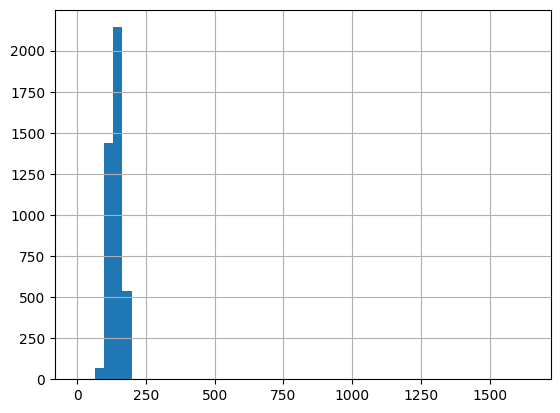

In [ ]:
df2['height'].hist(bins=50);

It seems like some heights have been entered in mm instead of cm.


### Exercise 5

List all the rows which have `height` > 1000

In [37]:
df2[df2.height > 1000]

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Lmdfflexb,Rmdfflexa,Rmdfflexb,Lmdfexta,Lmdfextb,Rmdfexta,Rmdfextb
0,84.00,84.00,1540.0,47.4,51.0,68.0,6.0,df,14.0,df,5.0,df,5.0,df
17,56.00,56.00,1120.0,21.9,38.0,36.0,17.0,df,16.0,df,14.0,df,10.0,df
20,61.00,61.00,1200.0,18.1,51.0,57.0,12.0,df,6.0,pf,6.0,df,5.0,pf
48,59.00,60.00,1180.0,22.1,55.0,54.0,20.0,pf,11.0,df,25.0,pf,3.0,df
62,85.00,88.00,1640.0,49.0,36.0,35.0,10.0,pf,6.0,df,10.0,pf,1.0,df
89,77.00,78.00,1460.0,31.7,104.0,96.0,2.0,df,4.0,df,0.0,df,5.0,df
106,54.75,55.25,1125.0,15.8,70.0,68.0,21.0,pf,22.0,pf,27.0,pf,30.0,pf
121,64.50,66.50,1270.0,25.9,60.0,52.0,6.0,df,15.0,df,11.0,pf,10.0,df
179,63.00,63.50,1270.0,23.0,75.0,75.0,13.0,df,11.0,df,0.0,df,2.0,df
306,79.50,79.00,1460.0,35.7,64.0,61.0,25.0,df,18.0,df,15.0,df,15.0,df


In [38]:
# ANSWER

# this gives all the rows where height >1000
df2[df2.height > 1000]

,LLegLen,RLegLen,height,weight,Lkneepop,Rkneepop,Lmdfflexa,Lmdfflexb,Rmdfflexa,Rmdfflexb,Lmdfexta,Lmdfextb,Rmdfexta,Rmdfextb
0,84.00,84.00,1540.0,47.4,51.0,68.0,6.0,df,14.0,df,5.0,df,5.0,df
17,56.00,56.00,1120.0,21.9,38.0,36.0,17.0,df,16.0,df,14.0,df,10.0,df
20,61.00,61.00,1200.0,18.1,51.0,57.0,12.0,df,6.0,pf,6.0,df,5.0,pf
48,59.00,60.00,1180.0,22.1,55.0,54.0,20.0,pf,11.0,df,25.0,pf,3.0,df
62,85.00,88.00,1640.0,49.0,36.0,35.0,10.0,pf,6.0,df,10.0,pf,1.0,df
89,77.00,78.00,1460.0,31.7,104.0,96.0,2.0,df,4.0,df,0.0,df,5.0,df
106,54.75,55.25,1125.0,15.8,70.0,68.0,21.0,pf,22.0,pf,27.0,pf,30.0,pf
121,64.50,66.50,1270.0,25.9,60.0,52.0,6.0,df,15.0,df,11.0,pf,10.0,df
179,63.00,63.50,1270.0,23.0,75.0,75.0,13.0,df,11.0,df,0.0,df,2.0,df
306,79.50,79.00,1460.0,35.7,64.0,61.0,25.0,df,18.0,df,15.0,df,15.0,df


### Exercise 6

Let's change all the `height` values that are > 1000 by dividing by 10.

To check what's happening, print out patient 17 data before and after the conversion.

In [56]:
print (df2.loc[17].height)
df2.loc[(df2.height>1000, 'height')]/=10
print (df2.loc[17].height)


112.0
112.0


In [47]:
# ANSWER

#to check this look at row 17 before and after
print (df2.loc[17].height)

df2.loc[df2.height>1000,'height'] /= 10

#to check this look at row 17 before and after
print (df2.loc[17].height)

112.0
112.0


Now we will redraw the histogram of heights.

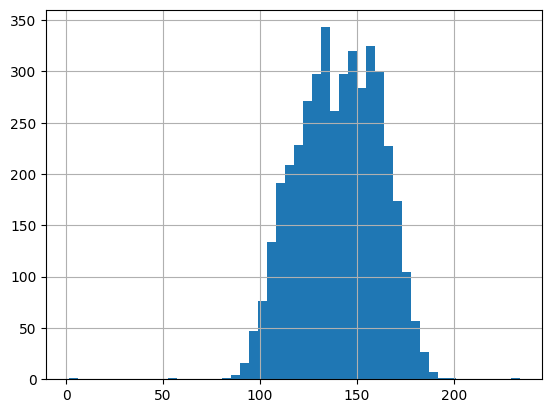

In [57]:
df2['height'].hist(bins=50);

## Exploring the data

### Exercise 7

In this dataset, we originally recorded the passive dorsiflexion range in two columns: the angle (in degrees) and a text field that says `df` (dorsiflexion) or `pf` (plantarflexion). This is encoded in the table in two fields. For example, the (positive) angle for the left ankle at maximum dorsiflexion with the knee extended is stored in the field `Lmdfexta`, and the `Lmdfextb` field records whether this corresponds to dorsiflexion (`df`) or plantarflexion (`pf`).

We classify people as having plantarflexor contracture if the clinical exam shows that the ankle at maximum dorsal flexion (`mdf`) with knee extended is in plantarflexion (`pf`).

What is the most common left plantarflexion angle with knee extended? Show this data as a histogram.

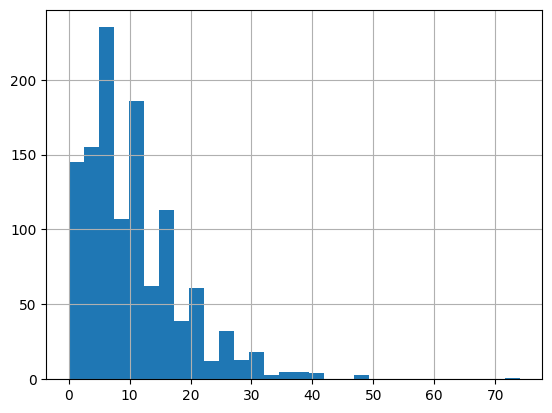

In [58]:
df2[df2.Lmdfextb=='pf']['Lmdfexta'].hist(bins=30);

In [63]:
# ANSWER



Using the histogram, what proportion of our patients have a contracture?

In [62]:
print(sum(df2.Lmdfextb=='pf'))


1199


### Exercise 8

By convention, `pf` is negative, so let's change the values in `lmdfexta` to be positive if `df` (dorsiflexion) and negative if `pf` (plantarflexion), and present this new angle as a histogram:

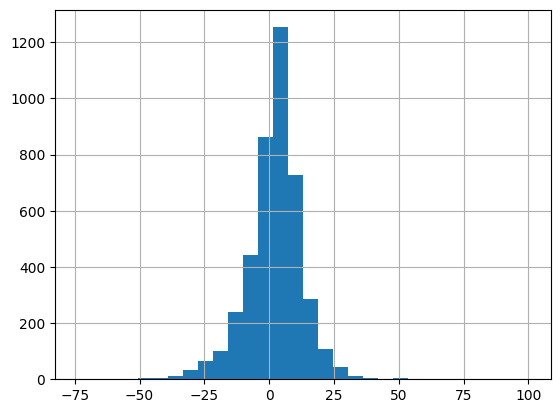

In [65]:
df2.apply(lambda x: -x['Lmdfexta'] if x['Lmdfextb'] == 'pf' else x['Lmdfexta'], axis=1).hist(bins=30);

## Additional notes

Finally for today, let's learn how to create your own pandas dataframe.

The syntax for this is:

```python
pd.DataFrame (data=None, index=None, columns=None, dtype=None, copy=None)
```

In [66]:

import pandas as pd
import numpy as np

`data` can be a dictionary:

In [67]:
d = {'col1': [1, 2], 'col2': [3, 4]}
data = pd.DataFrame(data=d)
data

,col1,col2
0,1,3
1,2,4


Or a `numpy` array:

In [68]:
d2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
data2 = pd.DataFrame(data=d2,columns=['x', 'y', 'z'])
data2

,x,y,z
0,1,2,3
1,4,5,6
2,7,8,9


You can also set the data type and index values:

In [69]:
data3 = pd.DataFrame (data=d2, columns=['x', 'y', 'z'], index=['a','b','c'], dtype=np.int8)
data3

# by default they are int64 or float 64:
print(data2.dtypes)
print(data3.dtypes)

x    int64
y    int64
z    int64
dtype: object
x    int8
y    int8
z    int8
dtype: object


In [70]:
d4 = np.array([[1, 2.1, 3.7], [4, 9.5, 6], [7.2, 8, 9]])
data4 = pd.DataFrame (data=d4, columns=['x', 'y', 'z'])
print(data4.dtypes)
data4

x    float64
y    float64
z    float64
dtype: object


,x,y,z
0,1.0,2.1,3.7
1,4.0,9.5,6.0
2,7.2,8.0,9.0


And you can also write dataframes to Excel, you can merge dataframes, and much, much more. You can find out a lot more on the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

# Classes

Classes are really helpful and used a lot in python so it's important to get a handle on them. In fact, you have already been using classes throughout this course: every variable in Python is an instance of a class!

In simple terms, a class is a way of creating a template for a group of things that look similar and that you want to do similar things to.

For example: _supermarket items_

| All items have | | You might want to |
|-----|--|------|
| name | | calculate a 10% off price |
| price | | calculate a 'health score' for an item |
| number in stock |   |  |
| nutritional information |    |  |


## Defining a class in Python

Let's start be looking at how we define a class.

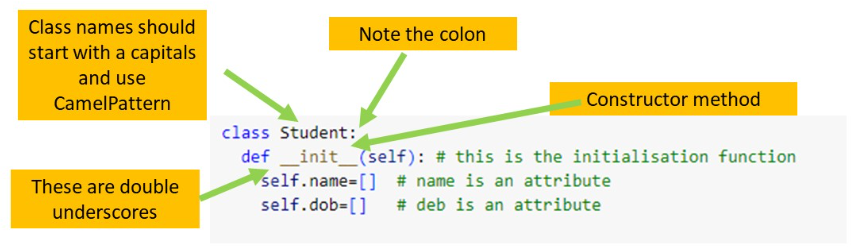

In [71]:
class Student:
  def __init__(self): # this is the constructor method
    self.name=[]  # name is an attribute
    self.dob=[]   # deb is an attribute

This defines a class called `Student`. It has an initialisation function `__init__()` which sets up a set of attributes for the class and assigns them some default value.

You can then create _instances_ of the `Student` class like this:


In [72]:
student1 = Student()   # <== note the brackets at the end


 `student1` is a _variable_ (note use of lower case), and specifically an _instance_ of the `Student` class.


The word 'self' can be confusing, but it just means the instance of the class that we are currently talking about.

In the example code above, we created an instance of the `Student` class and called this instance `student1`. As we create the instance, the `__init__()` function is called, with the argument `self` set to `student1`. This mechanism allows the `__init__()` function to access and initialise the attributes (`name` & `dob`) of `student1`.

When you print `student1`, it tells you it is an object of type `Student` and it gives its address in memory.


In [73]:
print (student1)

To access the attributes of the class, use the _dot notation_, for example:

In [74]:
print (student1.name)

[]


## Setting attributes

You can set attributes after the instance has been created:


In [75]:
student1 = Student()
student1.name = 'Nicky'

Or by modifying the `__init__()` method to accept additional arguments:

In [80]:
class Student:
  def __init__ (self, name):
    self.name = name
    self.dob = []

student2 = Student ('Frank')
print (student2.name)

Frank


You can also use default argument values in the `__init__()` method to combine both ideas:

In [82]:
class Student:
  def __init__ (self, name="unknown", dob=[]):
    self.name = name
    self.dob = dob

# student1.name will be set to "unknown":
student1 = Student()

# student2.name will now be set to "Frank". but the date of birth is empty:
student2 = Student ('Frank')

# student3.name will also be set to "unknown", but we have set the date of birth:
student3 = Student (dob=[3, 3, 2003])

print(student1.name, student1.dob)
print(student2.name, student2.dob)
print(student3.name, student3.dob)

unknown []
Frank []
unknown [3, 3, 2003]


We can use the `dir()` builtin function to list the attributes and methods of our new class:

In [83]:
dir (student1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dob',
 'name']

We can also use the `help()` function to produce a more informative printout, especially if we use docstrings to document the main class and/or any methods of interest:

In [84]:
class Student:
  """A class to hold information about students at KCL"""
  def __init__ (self, name="unknown", dob=[]):
    """initialise an instance of Student, optionally setting the name and dob.
    If left unspecified, the name will be set to "unknown", and the dob left empty"""
    self.name = name
    self.dob = dob

In [85]:
help (Student)

Help on class Student in module __main__:

class Student(builtins.object)
 |  Student(name='unknown', dob=[])
 |
 |  A class to hold information about students at KCL
 |
 |  Methods defined here:
 |
 |  __init__(self, name='unknown', dob=[])
 |      initialise an instance of Student, optionally setting the name and dob.
 |      If left unspecified, the name will be set to "unknown", and the dob left empty
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



### Exercise 9

Edit your `Student` class to add another attribute called `year_group`.

Edit the arguments of the `__init__()` method to take the `name` and `year_group` of the student.

Create an instance of the class called `new_student` for James in year 2.

In [88]:
class Student:
  def __init__ (self, name="unknown", dob=[], year_group=[]):
    self.name = name
    self.dob = dob
    self.year_group = year_group

new_student = Student()
new_student.name = 'James'
new_student.year_group = 2

print(new_student.name, new_student.year_group)

James 2


## Better print() output

When we `print()` an instance of our class, we might like represent the relevant information in a more convenient way, rather than just the type and address of the instance. To do this, so we can add a method called `__repr__()`, which will be called if we ask to print any instance. We can set this up like this:

In [89]:
class Student:
  """A class to hold information about students at KCL"""
  def __init__(self,name,year_group):
    self.name=name
    self.dob=[]
    self.year_group=year_group

  def __repr__(self):
    # we need the string conversion here, because year_group is an integer:
    return f'{self.name} in Year {self.year_group}'

Now, when we define and print an instance `student1`, instead of getting a pointer to the location of the object, we get a more informative statement about the student:

In [90]:
student1 = Student ('Nicky', 3)

print(student1)

Nicky in Year 3


## Date handling

Before we can set the date of birth, we need to learn a bit about dates. We will import the `date` class from `datetime` module, and import `relativedelta` from the `dateutil.relativedelta` module, which will allow us to make calculations from dates. Their use is illustrated in the example below:

In [91]:
from datetime import date
from dateutil.relativedelta import relativedelta

# gives us todays date:
today = date.today()

# sets a date using ( year, month, day ) format:
my_date = date (2022, 8, 4)

print('today:', today)
print('my date:', my_date)

difference = relativedelta (today, my_date)

# tells you the difference in years, months and days:
print('difference:', difference)
print('difference in years:', difference.years)

today: 2025-10-04
my date: 2022-08-04
difference: relativedelta(years=+3, months=+2)
difference in years: 3


So now we know a bit about dates, we can go back to our students and set their date of birth.

In [92]:
student1.dob = date(1982, 7, 5)
print(student1.dob)

1982-07-05


Suppose we wanted to know the current age of a student. We can create a method for the class which calculates age from the date of birth and the current date, and update the `__repr__()` method to display that information with `print()`:

In [93]:
from datetime import date
from dateutil.relativedelta import relativedelta

class Student:
  """A class to hold information about students at KCL"""
  def __init__(self, name, dob, year_group):
    self.name=name
    self.dob=dob
    self.year_group=year_group

  def __repr__(self):
    return f'{self.name} in Year {self.year_group} (currently {self.age().years} years old)'

  def age(self):
    """returns the age of the student"""
    return relativedelta (date.today(), self.dob)

student2 = Student('James', dob=date(2002, 9, 21), year_group=2)

print (student2)

James in Year 2 (currently 23 years old)


### Exercise 10

Edit the code below to add a new method called `increment_year_group()` to the `Student` class, which increments the `year_group` value by 1.

In [108]:
class Student:
  """A class to hold information about students at KCL"""
  def __init__(self, name, dob, year_group):
    self.name=name
    self.dob=dob
    self.year_group=year_group

  def __repr__(self):
    return f'{self.name} in Year {self.year_group} (currently {self.age().years} years old, will go into Year {self.increment_year_group()})'

  def age(self):
    """returns the age of the student"""
    return relativedelta (date.today(), self.dob)

  def increment_year_group(self):
    """increments the year_group value by 1"""
    return self.year_group + 1

student2 = Student('James', dob=date(2002, 9, 21), year_group=2)
print (student2)

James in Year 2 (currently 23 years old, will go into Year 3)
